## Battle of the Neighborhoods - Coursera Capstone Project

### Introduction

**In this Project, there will be an analysis on neighborhoods from Toronto, Canada and New York City. Due to globalization, people are starting businesses all over the world. For instance, there are people opening up donut shops in China. Meanwhile, there are Chinese people try to open Chinese restaurants overseas. A lot of people are targeting at Toronto and New York City. People will like to see which of the city is more competitive so that they could go to the other one to have their businesses settled down. This project will make comparisons between the two cities, and it will give Chinese people some ideas about where it the better place to open up a Chiense Restaurant.**

### Problem

**The purpose of this project is trying to find out which city is better to open up a Chinese restaurant between Toronto and New York.**

1. Visualize neighbourhoods in Toronto and New York City and try to find the best neighbourhoods that are the most popular in the cities.
2. Compare the picked two neighbourhoods.
3. Between Toronto and New York City, where's better to study and travel.
4. Make the final decision on which one of the two cities is good for opening up a Chinese restaurant.


### Libraries

1. Pandas: For creating and manipulating dataframes.

2. Folium: Python visualization library would be used to visualize the neighborhoods cluster distribution of using interactive leaflet map.

3. Scikit Learn: For importing k-means clustering.

4. JSON: Library to handle JSON files.

5. XML: To separate data from presentation and XML stores data in plain text format.

6. Geocoder: To retrieve Location Data.

7. Beautiful Soup and Requests: To scrap and library to handle http requests.

8. Matplotlib: Python Plotting Module.

### Data

For this project we need the following data:

1. GeoSpace data.
2. New York City data that contains list Boroughs, Neighbourhoods along with their latitude and longitude.
3. Toronto data that contains list Boroughs, Neighbourhoods along with their latitude and longtitude.

### Methodology

In [118]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium
from geopy.geocoders import Nominatim 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import json

print('Libraries imported.')

Libraries imported.


## First Part of Analysis: North York,Toronto

In [119]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)
df_toronto = table[0]
df_toronto.head(10)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [120]:
df_toronto.rename(columns = {"Postal Code": "PostalCode", "Neighbourhood": "Neighborhood"}, inplace = True)

df_toronto.drop(df_toronto[df_toronto.Borough == 'Not assigned'].index, inplace=True)

df_toronto = df_toronto.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(lambda x: ','.join(x)).reset_index()

print(df_toronto.shape)
df_toronto.head(10)

(103, 3)


,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Add latitude and longitude into the table

In [121]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_392fd26033404b6abf3978aea29684b9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PoL-cLPC5ySdWgy2Q0V_pdAAMRuFz7NRXjHmMKXt4E7p',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_392fd26033404b6abf3978aea29684b9.get_object(Bucket='finalproject-donotdelete-pr-iyh4qpj9awnzas',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

latlong = pd.read_csv(body)
latlong.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [122]:
latlong.rename(columns = {'Postal Code': 'PostalCode'}, inplace=True)
latlong.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [123]:
df_toronto.set_index('PostalCode')
latlong.set_index('PostalCode')
neighbor=pd.merge(df_toronto, latlong)
neighbor.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [124]:
print('Toronto has {} boroughs and {} neighborhoods'.format(
        len(neighbor['Borough'].unique()),
        neighbor.shape[0]
))

Toronto has 10 boroughs and 103 neighborhoods


### Getting the Toronto's geo values and bar chart of it

In [125]:
address = 'Toronto, CA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Toronto is at {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


Toronto is at 43.6534817, -79.3839347.


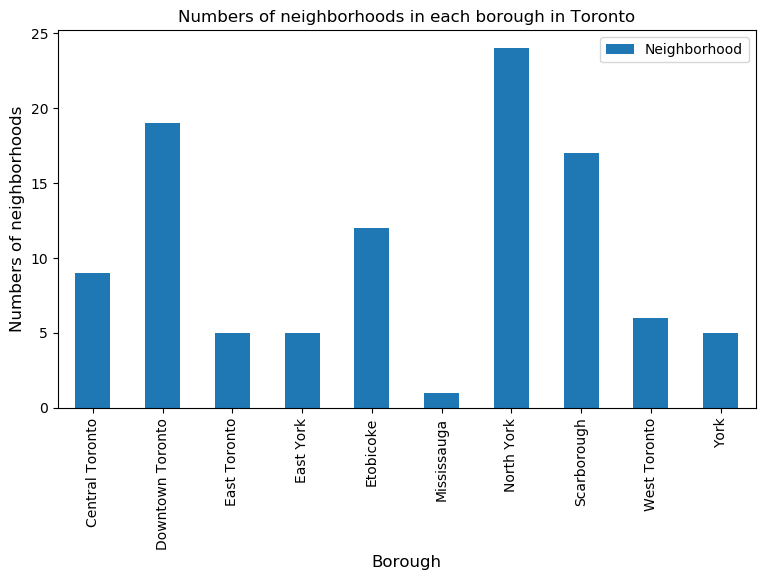

In [126]:
plt.figure(figsize=(9,5), dpi = 100)

plt.title('Numbers of neighborhoods in each borough in Toronto')

plt.xlabel('Borough', fontsize=12)

plt.ylabel('Numbers of neighborhoods', fontsize=12)

df_toronto.groupby('Borough')['Neighborhood'].count().plot(kind='bar')

plt.legend()

plt.show()

#### From here, we can see that North York has the most neighborhoods and most people. Thus, I would assume North York is a good option for people to open restaurant.

In [127]:
North_York_data = neighbor[neighbor['Borough'] == 'North York'].reset_index(drop=True)
North_York_data.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493
5,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493
6,M2P,North York,York Mills West,43.752758,-79.400049
7,M2R,North York,"Willowdale, Willowdale West",43.782736,-79.442259
8,M3A,North York,Parkwoods,43.753259,-79.329656
9,M3B,North York,Don Mills,43.745906,-79.352188


In [128]:
address = 'North York, Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('North York is at {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


North York is at 43.7543263, -79.44911696639593.


### Get information around North York

In [129]:
CLIENT_ID = 'WITJRJX1E5R0ZDLIU2ZAKHXMELTG2NBSV1JCR2EGYGUNW5DV' 
CLIENT_SECRET = 'JTAY4YPCVAR3PLKO1SUZZFLNULYDTTGJO1AMJUAAFS3SKMDE' 
VERSION = '20180605' 

In [130]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Found {} venues in {} neighborhoods.'.format(nearby_venues.shape[0], len(venues_list)))
    
    return(nearby_venues)

In [131]:
North_York_venues = getNearbyVenues(names=North_York_data['Neighborhood'],
                                   latitudes=North_York_data['Latitude'],
                                   longitudes=North_York_data['Longitude']
                                  )

Found 236 venues in 24 neighborhoods.


In [132]:
North_York_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,43.803762,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
1,Hillcrest Village,43.803762,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
2,Hillcrest Village,43.803762,-79.363452,Villa Madina,43.801685,-79.363938,Mediterranean Restaurant
3,Hillcrest Village,43.803762,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
5,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,SilverCity,43.778681,-79.344085,Movie Theater
6,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,CF Fairview Mall,43.777994,-79.343665,Shopping Mall
7,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,New York Fries - Fairview Mall,43.778605,-79.343577,Restaurant
8,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Apple Fairview,43.777883,-79.343789,Electronics Store
9,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.777082,-79.344557,Bakery


In [133]:
North_York_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Don Mills,25,25,25,25,25,25
Downsview,13,13,13,13,13,13
"Fairview, Henry Farm, Oriole",64,64,64,64,64,64
Glencairn,4,4,4,4,4,4
Hillcrest Village,4,4,4,4,4,4
Humber Summit,2,2,2,2,2,2


In [134]:
print('There are {} distinct venues in {} categories'.format(
        len(North_York_venues['Venue'].unique()),len(North_York_venues['Venue Category'].unique()
                                                    )))

There are 200 distinct venues in 101 categories


In [135]:
North_York_onehot = pd.get_dummies(North_York_venues[['Venue Category']], prefix="", prefix_sep="")


North_York_onehot['Neighborhood'] = North_York_venues['Neighborhood'] 


fixed_columns = [North_York_onehot.columns[-1]] + list(North_York_onehot.columns[:-1])
North_York_onehot = North_York_onehot[fixed_columns]

North_York_onehot.head(10)

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Optical Shop,Other Repair Shop,Park,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
North_York_grouped = North_York_onehot.groupby('Neighborhood').mean().reset_index()
North_York_grouped

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Optical Shop,Other Repair Shop,Park,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.095238,0.000000,0.000000,0.00,0.00,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.000000,0.00,0.000000,0.000000,0.047619,0.000000,0.00,0.047619,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.047619,0.000000,0.047619,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.047619,0.047619,0.0,0.047619,0.000000,0.00,0.0,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.047619,0.00,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,Bayview Village,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.250000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.043478,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,0.086957,0.043478,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.043478,0.043478,0.00,0.000000,0.0,0.000000,0.000000,0.043478,0.000000,0.086957,0.043478,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.0,0.043478,0.000000,0.00,0.0,0.043478,0.000000,0.043478,0.000000,0.086957,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.

### Top Venues in North York

In [137]:
num_top_venues = 5

for hood in North_York_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = North_York_grouped[North_York_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0  Coffee Shop  0.10
1         Bank  0.10
2  Pizza Place  0.05
3  Bridal Shop  0.05
4         Park  0.05


----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3                 Café  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Coffee Shop  0.09
1      Sandwich Place  0.09
2  Italian Restaurant  0.09
3        Liquor Store  0.04
4   Indian Restaurant  0.04


----Don Mills----
                 venue  freq
0                  Gym  0.12
1  Japanese Restaurant  0.08
2           Restaurant  0.08
3          Coffee Shop  0.08
4           Beer Store  0.08


----Downsview----
                  venue  freq
0                  Park  0.15
1            Food Truck  0.08
2  Gym / Fitness Center  0.08
3               Airport  0.08
4         Grocery Store  0.08


----Fairvi

In [138]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [139]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = North_York_grouped['Neighborhood']

for ind in np.arange(North_York_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(North_York_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Fried Chicken Joint,Sandwich Place,Middle Eastern Restaurant
1,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store
2,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Liquor Store,Butcher
3,Don Mills,Gym,Japanese Restaurant,Coffee Shop,Restaurant,Beer Store
4,Downsview,Park,Bank,Athletics & Sports,Shopping Mall,Baseball Field
5,"Fairview, Henry Farm, Oriole",Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Food Court
6,Glencairn,Asian Restaurant,Pub,Japanese Restaurant,Park,Women's Store
7,Hillcrest Village,Golf Course,Pool,Mediterranean Restaurant,Dog Run,Discount Store
8,Humber Summit,Gym,Pizza Place,Clothing Store,Comfort Food Restaurant,Construction & Landscaping
9,"Humberlea, Emery",Furniture / Home Store,Baseball Field,Women's Store,Dog Run,Construction & Landscaping


### Cluster North York Neighborhoods using K-mean

In [140]:
from sklearn.cluster import KMeans

In [141]:
kclusters = 5

North_York_grouped_clustering = North_York_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(North_York_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 3, 2, 4], dtype=int32)

In [142]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

North_York_merged = North_York_data

North_York_merged = North_York_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

North_York_merged.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M2H,North York,Hillcrest Village,43.803762,-79.363452,3.0,Golf Course,Pool,Mediterranean Restaurant,Dog Run,Discount Store
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,1.0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Food Court
2,M2K,North York,Bayview Village,43.786947,-79.385975,1.0,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714,NaN,NaN,NaN,NaN,NaN,NaN
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,0.0,Park,Piano Bar,Clothing Store,Coffee Shop,Comfort Food Restaurant
5,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493,1.0,Ramen Restaurant,Pizza Place,Restaurant,Café,Sushi Restaurant
6,M2P,North York,York Mills West,43.752758,-79.400049,0.0,Park,Convenience Store,Dog Run,Comfort Food Restaurant,Construction & Landscaping
7,M2R,North York,"Willowdale, Willowdale West",43.782736,-79.442259,1.0,Grocery Store,Pharmacy,Pizza Place,Butcher,Bank
8,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Dog Run,Comfort Food Restaurant,Construction & Landscaping
9,M3B,North York,Don Mills,43.745906,-79.352188,1.0,Gym,Japanese Restaurant,Coffee Shop,Restaurant,Beer Store


In [143]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(North_York_merged['Latitude'], North_York_merged['Longitude'], North_York_merged['Neighborhood'], North_York_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Test the Cluster

In [144]:
North_York_merged.loc[North_York_merged['Cluster Labels'] == 0, North_York_merged.columns[[1] + list(range(5, North_York_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,North York,0.0,Park,Piano Bar,Clothing Store,Coffee Shop,Comfort Food Restaurant
6,North York,0.0,Park,Convenience Store,Dog Run,Comfort Food Restaurant,Construction & Landscaping
8,North York,0.0,Park,Food & Drink Shop,Dog Run,Comfort Food Restaurant,Construction & Landscaping


In [145]:
North_York_merged.loc[North_York_merged['Cluster Labels'] == 1, North_York_merged.columns[[1] + list(range(5, North_York_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,North York,1.0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Food Court
2,North York,1.0,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store
5,North York,1.0,Ramen Restaurant,Pizza Place,Restaurant,Café,Sushi Restaurant
7,North York,1.0,Grocery Store,Pharmacy,Pizza Place,Butcher,Bank
9,North York,1.0,Gym,Japanese Restaurant,Coffee Shop,Restaurant,Beer Store
10,North York,1.0,Gym,Japanese Restaurant,Coffee Shop,Restaurant,Beer Store
11,North York,1.0,Coffee Shop,Bank,Fried Chicken Joint,Sandwich Place,Middle Eastern Restaurant
12,North York,1.0,Coffee Shop,Caribbean Restaurant,Miscellaneous Shop,Metro Station,Bar
13,North York,1.0,Park,Bank,Athletics & Sports,Shopping Mall,Baseball Field
14,North York,1.0,Park,Bank,Athletics & Sports,Shopping Mall,Baseball Field


In [146]:
North_York_merged.loc[North_York_merged['Cluster Labels'] == 2, North_York_merged.columns[[1] + list(range(5, North_York_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
22,North York,2.0,Gym,Pizza Place,Clothing Store,Comfort Food Restaurant,Construction & Landscaping


In [147]:
North_York_merged.loc[North_York_merged['Cluster Labels'] == 3, North_York_merged.columns[[1] + list(range(5, North_York_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North York,3.0,Golf Course,Pool,Mediterranean Restaurant,Dog Run,Discount Store


In [148]:
North_York_merged.loc[North_York_merged['Cluster Labels'] == 4, North_York_merged.columns[[1] + list(range(5, North_York_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,North York,4.0,Furniture / Home Store,Baseball Field,Women's Store,Dog Run,Construction & Landscaping


## Second Part of Analysis: New York City

In [149]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [150]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [151]:
neighborhoods_data = newyork_data['features']

In [152]:
neighborhoods_data[0]


{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [153]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
neighborhoods = pd.DataFrame(columns=column_names)

In [154]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [155]:
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [156]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


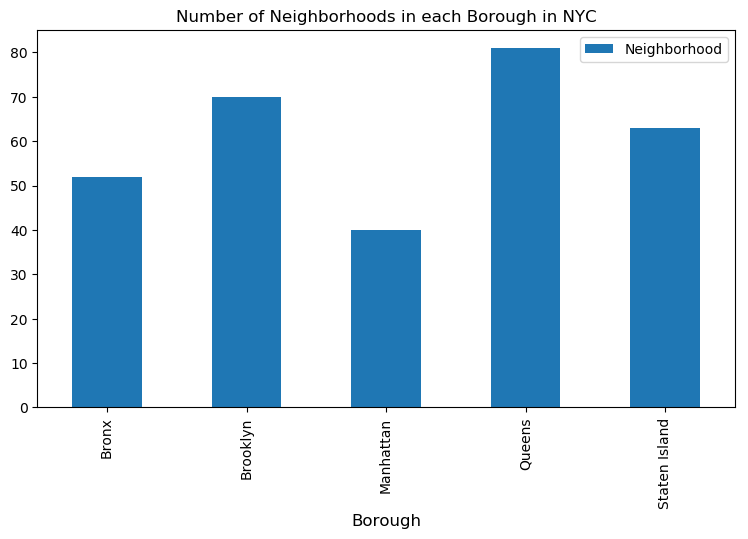

In [157]:
plt.figure(figsize=(9,5), dpi=100)

plt.title('Number of Neighborhoods in each Borough in NYC')

plt.xlabel('Borough', fontsize=12)

plt.xlabel('Number of Neighborhood', fontsize=12)

neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')

plt.legend()

plt.show()

#### Follow the same analyzing method used in Toronto, I decide to analyze Queen within New York because Queen has the largest neighborhoods in NYC. Next step is trying to get the location

In [158]:
Queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138
5,Queens,Corona,40.742382,-73.856825
6,Queens,Forest Hills,40.725264,-73.844475
7,Queens,Kew Gardens,40.705179,-73.829819
8,Queens,Richmond Hill,40.697947,-73.831833
9,Queens,Flushing,40.764454,-73.831773


In [159]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent = 'my-application')
location = geolocator.geocode(address)
Qlatitude = location.latitude
Qlongitude = location.longitude
print('Queen area is located at{}, {}.'.format(Qlatitude, Qlongitude))

Queen area is located at40.7498243, -73.7976337.


In [160]:
map_Queens = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(Queens_data['Latitude'], Queens_data['Longitude'], Queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Queens)  
    
map_Queens


#### Explore the first neighborhood in Queen

In [161]:
Queens_data.loc[0, 'Neighborhood']

'Astoria'

In [162]:
neighborhood_latitude = Queens_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Queens_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Queens_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.


In [163]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=WITJRJX1E5R0ZDLIU2ZAKHXMELTG2NBSV1JCR2EGYGUNW5DV&client_secret=JTAY4YPCVAR3PLKO1SUZZFLNULYDTTGJO1AMJUAAFS3SKMDE&v=20180605&ll=40.76850859335492,-73.91565374304234&radius=500&limit=100'

In [164]:
results = requests.get(url).json()

In [165]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [166]:
from pandas.io.json import json_normalize

In [167]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Favela Grill,Brazilian Restaurant,40.767348,-73.917897
1,Orange Blossom,Gourmet Shop,40.769856,-73.917012
2,Titan Foods Inc.,Gourmet Shop,40.769198,-73.919253
3,Simply Fit Astoria,Gym,40.769114,-73.912403
4,CrossFit Queens,Gym,40.769404,-73.918977


#### Explore Neighborhoods in Queen

In [168]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Found {} venues in {} neighborhoods.'.format(nearby_venues.shape[0], len(venues_list)))
    
    return(nearby_venues)

In [169]:
Queens_venues = getNearbyVenues(names=Queens_data['Neighborhood'],
                                   latitudes=Queens_data['Latitude'],
                                   longitudes=Queens_data['Longitude'])

Found 2088 venues in 81 neighborhoods.


In [170]:
Queens_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,Simply Fit Astoria,40.769114,-73.912403,Gym
4,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
5,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant
6,Astoria,40.768509,-73.915654,Al-sham Sweets and Pastries,40.768077,-73.911561,Middle Eastern Restaurant
7,Astoria,40.768509,-73.915654,Sitan Muay Thai,40.766108,-73.913224,Martial Arts School
8,Astoria,40.768509,-73.915654,Irish Rover,40.765835,-73.914647,Pub
9,Astoria,40.768509,-73.915654,Noisette,40.768544,-73.911248,Dessert Shop


In [171]:
Queens_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,20,20,20,20,20,20
Astoria,100,100,100,100,100,100
Astoria Heights,10,10,10,10,10,10
Auburndale,20,20,20,20,20,20
Bay Terrace,38,38,38,38,38,38
Bayside,72,72,72,72,72,72
Bayswater,1,1,1,1,1,1
Beechhurst,14,14,14,14,14,14
Bellaire,11,11,11,11,11,11


In [172]:
print('There are {} distinct venues in {} categories.'.format(
    len(Queens_venues['Venue'].unique()),len(Queens_venues['Venue Category'].unique())))

There are 1718 distinct venues in 275 categories.


In [173]:
Queens_onehot = pd.get_dummies(Queens_venues[['Venue Category']], prefix="", prefix_sep="")

Queens_onehot['Neighborhood'] = Queens_venues['Neighborhood'] 


neighbor = Queens_onehot['Neighborhood']
Queens_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
Queens_onehot.insert(0, 'Neighborhood', neighbor)

Queens_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Y

In [174]:
Queens_grouped = Queens_onehot.groupby('Neighborhood').mean().reset_index()
Queens_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Y

In [175]:
num_top_venues = 10

for hood in Queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Queens_grouped[Queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
            venue  freq
0       Surf Spot  0.20
1   Metro Station  0.10
2  Sandwich Place  0.10
3       Wine Shop  0.05
4        Bus Stop  0.05
5      Playground  0.05
6      Restaurant  0.05
7           Beach  0.05
8      Donut Shop  0.05
9     Pizza Place  0.05


----Astoria----
                       venue  freq
0                        Bar  0.07
1  Middle Eastern Restaurant  0.06
2                 Hookah Bar  0.04
3         Seafood Restaurant  0.04
4           Greek Restaurant  0.04
5          Indian Restaurant  0.04
6                     Bakery  0.03
7   Mediterranean Restaurant  0.03
8                       Café  0.03
9            Bubble Tea Shop  0.02


----Astoria Heights----
                venue  freq
0        Burger Joint   0.1
1         Supermarket   0.1
2              Bakery   0.1
3       Bowling Alley   0.1
4          Playground   0.1
5               Plaza   0.1
6         Pizza Place   0.1
7  Italian Restaurant   0.1
8              Hostel   0.1
9         B

                  venue  freq
0  Gym / Fitness Center  0.08
1                   Gym  0.08
2           Yoga Studio  0.05
3                  Park  0.05
4     Convenience Store  0.05
5           Pizza Place  0.05
6       Thai Restaurant  0.05
7              Pharmacy  0.05
8        Farmers Market  0.03
9          Optical Shop  0.03


----Forest Hills Gardens----
            venue  freq
0          Bakery  0.09
1  Sandwich Place  0.09
2   Grocery Store  0.09
3  Ice Cream Shop  0.05
4           Plaza  0.05
5      Playground  0.05
6     Pizza Place  0.05
7        Pharmacy  0.05
8      Donut Shop  0.05
9            Park  0.05


----Fresh Meadows----
                           venue  freq
0                    Bus Station  0.21
1                       Pharmacy  0.14
2             Chinese Restaurant  0.14
3                     Food Truck  0.07
4  Vegetarian / Vegan Restaurant  0.07
5                     Playground  0.07
6                    Pizza Place  0.07
7                  Grocery Store  0.07


                       venue  freq
0                 Sports Bar  0.08
1         Chinese Restaurant  0.08
2               Dessert Shop  0.08
3         Italian Restaurant  0.08
4                       Park  0.08
5                      Diner  0.08
6                 Playground  0.08
7                Pizza Place  0.08
8  South American Restaurant  0.08
9                       Bank  0.08


----Murray Hill----
               venue  freq
0  Korean Restaurant  0.49
1        Supermarket  0.04
2        Coffee Shop  0.04
3                Bar  0.04
4               Bank  0.04
5          BBQ Joint  0.02
6                Pub  0.02
7     Cosmetics Shop  0.02
8        Pizza Place  0.02
9  Fish & Chips Shop  0.02


----Neponsit----
                     venue  freq
0                    Beach   1.0
1        Accessories Store   0.0
2  New American Restaurant   0.0
3     Other Great Outdoors   0.0
4             Optical Shop   0.0
5                   Office   0.0
6             Noodle House   0.0
7            

                   venue  freq
0             Donut Shop  0.12
1            Bus Station  0.12
2                   Park  0.06
3  Check Cashing Service  0.06
4                    Gym  0.06
5             Shoe Store  0.06
6           Liquor Store  0.06
7             Laundromat  0.06
8   Fast Food Restaurant  0.06
9         Sandwich Place  0.06


----St. Albans----
                  venue  freq
0  Caribbean Restaurant  0.21
1         Deli / Bodega  0.05
2     Health Food Store  0.05
3   Fried Chicken Joint  0.05
4       Motorcycle Shop  0.05
5                  Café  0.05
6         Shopping Mall  0.05
7  Fast Food Restaurant  0.05
8    Chinese Restaurant  0.05
9    Seafood Restaurant  0.05


----Steinway----
                  venue  freq
0   Rental Car Location  0.14
1         Deli / Bodega  0.05
2         Auto Workshop  0.05
3               Brewery  0.05
4           Supermarket  0.05
5      Sushi Restaurant  0.05
6           Men's Store  0.05
7  Gym / Fitness Center  0.05
8           Pizza P

In [176]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [177]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Queens_grouped['Neighborhood']

for ind in np.arange(Queens_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Coffee Shop,Burrito Place,Bus Stop,Board Shop,Café,Beach,Donut Shop
1,Astoria,Bar,Middle Eastern Restaurant,Seafood Restaurant,Indian Restaurant,Hookah Bar,Greek Restaurant,Mediterranean Restaurant,Bakery,Café,Pub
2,Astoria Heights,Hostel,Italian Restaurant,Pizza Place,Bus Station,Burger Joint,Plaza,Bowling Alley,Supermarket,Bakery,Playground
3,Auburndale,Italian Restaurant,Bar,Athletics & Sports,Mobile Phone Shop,Fast Food Restaurant,Mattress Store,Supermarket,Furniture / Home Store,Noodle House,Korean Restaurant
4,Bay Terrace,Clothing Store,Pizza Place,Cosmetics Shop,American Restaurant,Shoe Store,Bank,Donut Shop,Women's Store,Mobile Phone Shop,Kids Store
5,Bayside,Bar,Pizza Place,Sushi Restaurant,American Restaurant,Indian Restaurant,Mexican Restaurant,Steakhouse,Burger Joint,Pub,Bakery
6,Bayswater,Playground,Yoga Studio,Farm,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farmers Market
7,Beechhurst,Optical Shop,Gym / Fitness Center,Boutique,Supermarket,Shopping Plaza,Donut Shop,Chinese Restaurant,Park,Italian Restaurant,Gym
8,Bellaire,Chinese Restaurant,Italian Restaurant,Convenience Store,Moving Target,Bus Station,Bus Stop,Greek Restaurant,Gym,Breakfast Spot,Deli / Bodega
9,Belle Harbor,Beach,Spa,Pub,Deli / Bodega,Mexican Restaurant,Donut Shop,Pharmacy,Chinese Restaurant,Bakery,Italian Restaurant


#### Clustering

In [178]:
kclusters = 5

manhattan_grouped_clustering = Queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 4, 1, 1, 1], dtype=int32)

In [179]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Queens_merged = Queens_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Queens_merged = Queens_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Queens_merged.head(10) # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,1,Bar,Middle Eastern Restaurant,Seafood Restaurant,Indian Restaurant,Hookah Bar,Greek Restaurant,Mediterranean Restaurant,Bakery,Café,Pub
1,Queens,Woodside,40.746349,-73.901842,1,Grocery Store,Thai Restaurant,Filipino Restaurant,Bar,Latin American Restaurant,Bakery,American Restaurant,Pub,Donut Shop,Sandwich Place
2,Queens,Jackson Heights,40.751981,-73.882821,1,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Mexican Restaurant,Empanada Restaurant,Supermarket,Supplement Shop
3,Queens,Elmhurst,40.744049,-73.881656,1,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Snack Place,South American Restaurant,Malay Restaurant,Food Court,Food Truck
4,Queens,Howard Beach,40.654225,-73.838138,1,Pharmacy,Italian Restaurant,Sandwich Place,Fast Food Restaurant,Spa,Chinese Restaurant,Diner,Supermarket,Donut Shop,Sporting Goods Shop
5,Queens,Corona,40.742382,-73.856825,1,Mexican Restaurant,Supermarket,Bakery,Park,South American Restaurant,Empanada Restaurant,Donut Shop,Chinese Restaurant,Italian Restaurant,Restaurant
6,Queens,Forest Hills,40.725264,-73.844475,1,Gym / Fitness Center,Gym,Yoga Studio,Pizza Place,Park,Convenience Store,Thai Restaurant,Pharmacy,Video Game Store,Supplement Shop
7,Queens,Kew Gardens,40.705179,-73.829819,1,Chinese Restaurant,Park,Deli / Bodega,Donut Shop,Bank,Bar,Indian Restaurant,Pizza Place,Pet Store,Cosmetics Shop
8,Queens,Richmond Hill,40.697947,-73.831833,1,Pizza Place,Bank,Lounge,Latin American Restaurant,Pet Store,Pet Service,Deli / Bodega,Park,Clothing Store,Diner
9,Queens,Flushing,40.764454,-73.831773,1,Hotpot Restaurant,Bubble Tea Shop,Chinese Restaurant,Korean Restaurant,Bakery,Karaoke Bar,Construction & Landscaping,Gym / Fitness Center,Szechuan Restaurant,Gym


In [181]:
# create map
map_clusters = folium.Map(location=[Qlatitude, Qlongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Queens_merged['Latitude'], Queens_merged['Longitude'], Queens_merged['Neighborhood'], Queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Exam Clusters

In [185]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 0, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Breezy Point,Beach,Bus Stop,Monument / Landmark,Trail,Yoga Studio,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm
50,Neponsit,Beach,Yoga Studio,Farm,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farmers Market,Dumpling Restaurant
78,Hammels,Beach,Diner,Fried Chicken Joint,Dog Run,Gym / Fitness Center,Bus Stop,Bus Station,Shoe Store,Food Truck,Deli / Bodega


In [186]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 1, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Bar,Middle Eastern Restaurant,Seafood Restaurant,Indian Restaurant,Hookah Bar,Greek Restaurant,Mediterranean Restaurant,Bakery,Café,Pub
1,Woodside,Grocery Store,Thai Restaurant,Filipino Restaurant,Bar,Latin American Restaurant,Bakery,American Restaurant,Pub,Donut Shop,Sandwich Place
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Mexican Restaurant,Empanada Restaurant,Supermarket,Supplement Shop
3,Elmhurst,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Snack Place,South American Restaurant,Malay Restaurant,Food Court,Food Truck
4,Howard Beach,Pharmacy,Italian Restaurant,Sandwich Place,Fast Food Restaurant,Spa,Chinese Restaurant,Diner,Supermarket,Donut Shop,Sporting Goods Shop
5,Corona,Mexican Restaurant,Supermarket,Bakery,Park,South American Restaurant,Empanada Restaurant,Donut Shop,Chinese Restaurant,Italian Restaurant,Restaurant
6,Forest Hills,Gym / Fitness Center,Gym,Yoga Studio,Pizza Place,Park,Convenience Store,Thai Restaurant,Pharmacy,Video Game Store,Supplement Shop
7,Kew Gardens,Chinese Restaurant,Park,Deli / Bodega,Donut Shop,Bank,Bar,Indian Restaurant,Pizza Place,Pet Store,Cosmetics Shop
8,Richmond Hill,Pizza Place,Bank,Lounge,Latin American Restaurant,Pet Store,Pet Service,Deli / Bodega,Park,Clothing Store,Diner
9,Flushing,Hotpot Restaurant,Bubble Tea Shop,Chinese Restaurant,Korean Restaurant,Bakery,Karaoke Bar,Construction & Landscaping,Gym / Fitness Center,Szechuan Restaurant,Gym


In [187]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 2, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Somerville,Park,Yoga Studio,Falafel Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Farm,Dry Cleaner


In [188]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 3, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,Brookville,Deli / Bodega,Yoga Studio,Farmers Market,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant


In [189]:
Queens_merged.loc[Queens_merged['Cluster Labels'] == 4, Queens_merged.columns[[1] + list(range(5, Queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,Bayswater,Playground,Yoga Studio,Farm,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farmers Market
